<a href="https://colab.research.google.com/github/ferjozsot23/Machine-Learning-Projects/blob/main/2023-2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("Detalle de Aprobación por Estudiante 2023-B.xlsx")

In [ ]:
df.sample(2)

,Código Estudiante,Código Materia,Materia,Paralelo,Profesor,Nro.Matrícula,Calif1,Calif2,Calif3,CalifFinal,Aprueba,Aprueba Mecanismo,Aprueba Ubicación,Facultad Aspira,Carrera Aspira,Jornada,CalifSNNA,Retiro
1302,202321629,CNICR050,LENGUAJE Y COMUNICACION (CNICR050),GR18,LEGÑA CASANOVA MARTHA SILVANA,1.0,15.57,13.10,NaN,28.67,APRUEBA,NO,NO,INGENIERIA CIVIL,(RRA20) INGENIERÍA AMBIENTAL,MATUTINA,924.0,NaN
3890,202321037,CNICR040,FUNDAMENTOS DE QUIMICA (CNICR040),GR33,ESTRADA CANDO GABRIELA ESTEFANIA,1.0,10.97,17.09,NaN,28.06,APRUEBA,NO,NO,CIENCIAS ADMINISTRATIVAS,(RRA20) INGENIERÍA DE LA PRODUCCIÓN,VESPERTINA,870.0,NaN


In [ ]:
df["Código Estudiante"].nunique()

2622

Código Estudiante
202321898                                                                                                                                                                    5
202320522                                                                                                                                                                    5
202320491                                                                                                                                                                    5
202320492                                                                                                                                                                    5
202320493                                                                                                                                                                    5
                                                                                                           

In [ ]:
def determinar_aprobacion_final(row):
    if row["Aprueba"] == "APRUEBA" and pd.isna(row["Calif3"]):
        return "Aprueba sin suple"
    elif row["Aprueba"] == "APRUEBA" and not pd.isna(row["Calif3"]):
        return "Aprueba con suple"
    elif row["Aprueba"] == "REPRUEBA" and not pd.isna(row["Calif3"]):
        return "Reprueba con suple"
    elif row["Aprueba"] == "REPRUEBA" and pd.isna(row["Calif3"]):
        return "Reprueba sin suple"
    else:
        return "No definido"

df["AprobacionFinal"] = df.apply(determinar_aprobacion_final, axis=1)


In [ ]:
df.sample(2)

,Código Estudiante,Código Materia,Materia,Paralelo,Profesor,Nro.Matrícula,Calif1,Calif2,Calif3,CalifFinal,Aprueba,Aprueba Mecanismo,Aprueba Ubicación,Facultad Aspira,Carrera Aspira,Jornada,CalifSNNA,Retiro,AprobacionFinal
11479,202210627,CNAER040,FUNDAMENTOS DE LA CONTABILIDAD (CNAER040),GRAB,VACACELA PINEDA JUAN GABRIEL,1.0,16.75,13.63,NaN,30.38,APRUEBA,NO,NO,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,MATUTINA,NaN,NaN,Aprueba sin suple
9540,202321611,CNICR030,FISICA (CNICR030),GR22,MONTENEGRO SALAZAR BYRON ESTEBAN,1.0,10.90,0.00,NaN,10.90,REPRUEBA,NO,NO,INGENIERIA CIVIL,(RRA20) INGENIERÍA CIVIL,VESPERTINA,836.0,NaN,Reprueba sin suple


In [ ]:
df.to_excel('output2.xlsx', index=False)


In [ ]:
import pandas as pd

df_calf1 = df[df["AprobacionFinal"]=="Reprueba sin suple"]

ocurrencias = df_calf1['Código Estudiante'].value_counts()

ocurrencias_df = ocurrencias.reset_index()
ocurrencias_df.columns = ['CodEstudiante', 'CantidadMaterias']

ocurrencias_grupo = ocurrencias_df.groupby('CantidadMaterias').size().reset_index()
ocurrencias_grupo.columns = ['CantidadMaterias', 'Conteo']

ocurrencias_grupo_calf1 = ocurrencias_grupo



In [ ]:
ocurrencias_grupo_calf1

,CantidadMaterias,Conteo
0,1,176
1,2,144
2,3,110
3,4,121
4,5,306


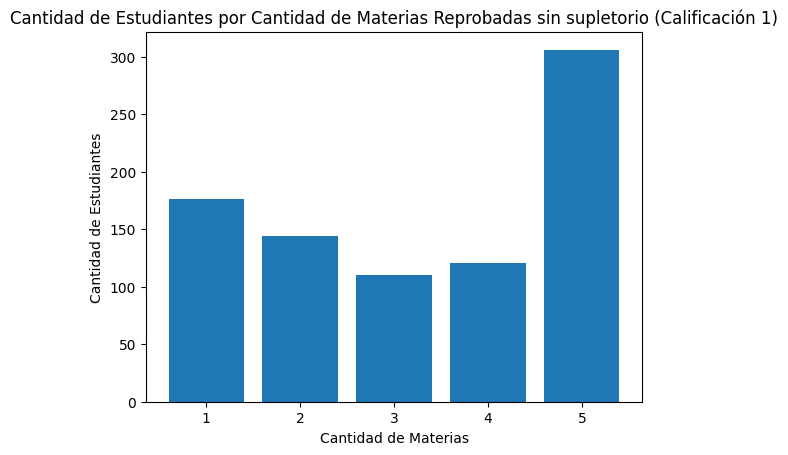

In [ ]:
import matplotlib.pyplot as plt


plt.bar(ocurrencias_grupo_calf1['CantidadMaterias'], ocurrencias_grupo_calf1['Conteo'])


plt.xlabel('Cantidad de Materias')
plt.ylabel('Cantidad de Estudiantes')
plt.title('Cantidad de Estudiantes por Cantidad de Materias Reprobadas sin supletorio (Calificación 1)')

plt.show()


In [ ]:
import pandas as pd

df_calf2 = df[df["AprobacionFinal"]=="Reprueba con suple"]

ocurrencias = df_calf2['Código Estudiante'].value_counts()

ocurrencias_df = ocurrencias.reset_index()
ocurrencias_df.columns = ['CodEstudiante', 'CantidadMaterias']

ocurrencias_grupo = ocurrencias_df.groupby('CantidadMaterias').size().reset_index()
ocurrencias_grupo.columns = ['CantidadMaterias', 'Conteo']

ocurrencias_grupo_calf2 = ocurrencias_grupo


In [ ]:
ocurrencias_grupo_calf2

,CantidadMaterias,Conteo
0,1,390
1,2,321
2,3,268
3,4,175
4,5,85


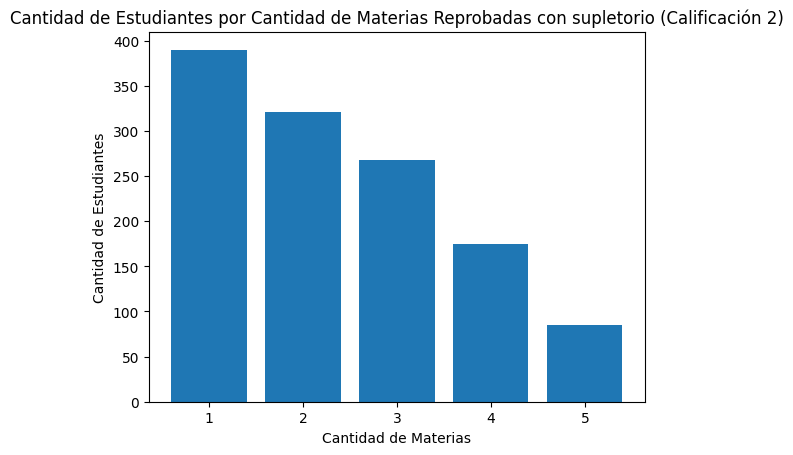

In [ ]:
import matplotlib.pyplot as plt


plt.bar(ocurrencias_grupo_calf2['CantidadMaterias'], ocurrencias_grupo_calf2['Conteo'])

plt.xlabel('Cantidad de Materias')
plt.ylabel('Cantidad de Estudiantes')
plt.title('Cantidad de Estudiantes por Cantidad de Materias Reprobadas con supletorio (Calificación 2)')

plt.show()


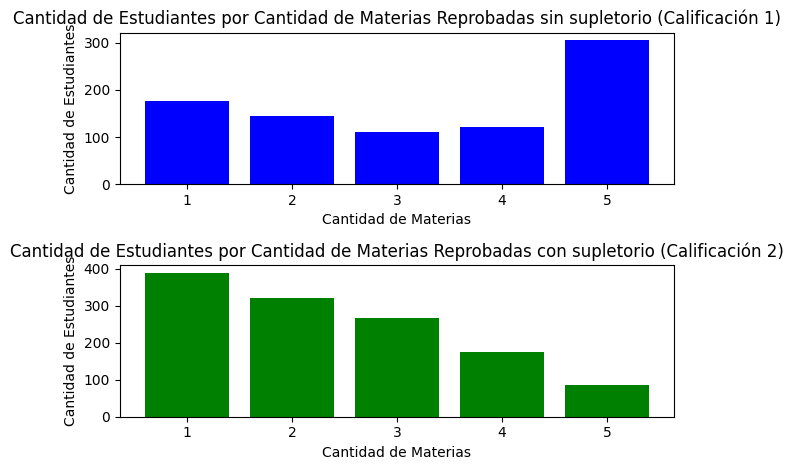

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y dos subgráficos
fig, axs = plt.subplots(2)

# Graficar el primer conjunto de datos
axs[0].bar(ocurrencias_grupo_calf1['CantidadMaterias'], ocurrencias_grupo_calf1['Conteo'], color='b')
axs[0].set_title('Cantidad de Estudiantes por Cantidad de Materias Reprobadas sin supletorio (Calificación 1)')
axs[0].set_xlabel('Cantidad de Materias')
axs[0].set_ylabel('Cantidad de Estudiantes')

# Graficar el segundo conjunto de datos
axs[1].bar(ocurrencias_grupo['CantidadMaterias'], ocurrencias_grupo['Conteo'], color='g')
axs[1].set_title('Cantidad de Estudiantes por Cantidad de Materias Reprobadas con supletorio (Calificación 2)')
axs[1].set_xlabel('Cantidad de Materias')
axs[1].set_ylabel('Cantidad de Estudiantes')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## DATAFRAME ORIGINAL

In [ ]:
df.sample(2)

,Código Estudiante,Código Materia,Materia,Paralelo,Profesor,Nro.Matrícula,Calif1,Calif2,Calif3,CalifFinal,Aprueba,Aprueba Mecanismo,Aprueba Ubicación,Facultad Aspira,Carrera Aspira,Jornada,CalifSNNA,Retiro
10953,202310230,CNTSR020,GEOMETRIA (CNTSR020),B,MOLINA PAREDES MARCO ANTONIO,2.0,6.68,6.18,NaN,12.86,REPRUEBA,NO,NO,TECNOLOGICA,(RRA20) REDES Y TELECOMUNICACIONES,VESPERTINA,795.0,NaN
6741,202320447,CNICR010,FUNDAMENTOS DE MATEMATICA (CNICR010),GR9,MONAR AGUIAR TAMARA SILVANA,1.0,10.33,11.23,9.75,9.75,REPRUEBA,NO,NO,INGENIERIA ELECTRICA Y ELECTRONICA,(RRA20) ELECTRÓNICA Y AUTOMATIZACIÓN,MATUTINA,976.0,NaN


## PROCESO PARA OBTENER EL ATRIBUTO "APRUEBA NIVELACIÓN"

In [ ]:
df['Aprueba Ubicación'] = df.apply(lambda row: 'NoAplica' if row['Aprueba'] == 'APRUEBA' else row['Aprueba Ubicación'], axis=1)


In [ ]:
df[df["Código Estudiante"] == "202321891"]

,Código Estudiante,Código Materia,Materia,Paralelo,Profesor,Nro.Matrícula,Calif1,Calif2,Calif3,CalifFinal,Aprueba,Aprueba Mecanismo,Aprueba Ubicación,Facultad Aspira,Carrera Aspira,Jornada,CalifSNNA,Retiro
35,202321891,CNICR050,LENGUAJE Y COMUNICACION (CNICR050),GRAC,CAZA GUALOTUÑA CARLOS ROBERTO,1.0,14.15,15.97,NaN,30.12,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN
36,202321891,CNICR010,FUNDAMENTOS DE MATEMATICA (CNICR010),GRAC,HARO ORTUÑO JORGE RAMIRO,1.0,11.16,11.71,9.40,9.40,REPRUEBA,NO,SI,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN
37,202321891,CNAER040,FUNDAMENTOS DE LA CONTABILIDAD (CNAER040),GRAC,PACA CAGUANA VICTORIA ELIZABETH,1.0,10.14,7.87,25.92,21.97,REPRUEBA,NO,SI,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN
38,202321891,CNAER030,INTRODUCCION A LA ADMINISTRACION (CNAER030),GRAC,PACA CAGUANA VICTORIA ELIZABETH,1.0,13.03,12.57,25.95,25.78,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN
39,202321891,CNICR020,GEOMETRIA (CNICR020),GRAC,SANCHEZ MIRANDA XIMENA JHOANA,1.0,13.27,7.85,27.00,24.06,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN


In [ ]:
df.columns

Index(['Código Estudiante', 'Código Materia', 'Materia', 'Paralelo',
       'Profesor', 'Nro.Matrícula', 'Calif1', 'Calif2', 'Calif3', 'CalifFinal',
       'Aprueba', 'Aprueba Mecanismo', 'Aprueba Ubicación', 'Facultad Aspira',
       'Carrera Aspira', 'Jornada', 'CalifSNNA', 'Retiro'],
      dtype='object')

In [ ]:
def evaluar_aprueba_nivelacion_con_exonera(x):
    if (x == 'NoAplica').all():
        return 'NoNecesita'
    elif (x == 'NO').any():
        return 'NoRindió/NoAprobó'
    else:
        return 'SI'

df['aprueba_nivelacion_con_exonera'] = df.groupby('Código Estudiante')['Aprueba Ubicación'].transform(evaluar_aprueba_nivelacion_con_exonera)


In [ ]:
df['aprueba_nivelacion_con_exonera'] .value_counts()

aprueba_nivelacion_con_exonera
NoRindió/NoAprobó    6653
NoNecesita           3944
SI                    886
Name: count, dtype: int64

In [ ]:
df[df["Código Estudiante"] == "202321891"]

,Código Estudiante,Código Materia,Materia,Paralelo,Profesor,Nro.Matrícula,Calif1,Calif2,Calif3,CalifFinal,Aprueba,Aprueba Mecanismo,Aprueba Ubicación,Facultad Aspira,Carrera Aspira,Jornada,CalifSNNA,Retiro,aprueba_nivelacion_con_exonera
35,202321891,CNICR050,LENGUAJE Y COMUNICACION (CNICR050),GRAC,CAZA GUALOTUÑA CARLOS ROBERTO,1.0,14.15,15.97,NaN,30.12,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN,SI
36,202321891,CNICR010,FUNDAMENTOS DE MATEMATICA (CNICR010),GRAC,HARO ORTUÑO JORGE RAMIRO,1.0,11.16,11.71,9.40,9.40,REPRUEBA,NO,SI,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN,SI
37,202321891,CNAER040,FUNDAMENTOS DE LA CONTABILIDAD (CNAER040),GRAC,PACA CAGUANA VICTORIA ELIZABETH,1.0,10.14,7.87,25.92,21.97,REPRUEBA,NO,SI,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN,SI
38,202321891,CNAER030,INTRODUCCION A LA ADMINISTRACION (CNAER030),GRAC,PACA CAGUANA VICTORIA ELIZABETH,1.0,13.03,12.57,25.95,25.78,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN,SI
39,202321891,CNICR020,GEOMETRIA (CNICR020),GRAC,SANCHEZ MIRANDA XIMENA JHOANA,1.0,13.27,7.85,27.00,24.06,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN,SI


## PIVOTEAR LAS MATERIAS

In [ ]:
pivot_df = df.pivot_table(index='Código Estudiante', columns='Materia', values='Aprueba', aggfunc='first')

pivot_df = pivot_df.fillna(False)
pivot_df = pivot_df.reset_index()



In [ ]:
pivot_df

Materia,Código Estudiante,FISICA (CNICR030),FISICA (CNTSR030),FUNDAMENTOS DE MATEMATICA (CNICR010),FUNDAMENTOS DE LA CONTABILIDAD (CNAER040),FUNDAMENTOS DE LA MATEMATICA (CNTSR010),FUNDAMENTOS DE QUIMICA (CNICR040),GEOMETRIA (CNICR020),GEOMETRIA (CNTSR020),INTRODUCCION A LA ADMINISTRACION (CNAER030),LENGUAJE Y COMUNICACION (CNICR050),QUIMICA (CNTSR040)
0,202120603,False,False,False,REPRUEBA,False,False,False,False,False,False,False
1,202321705,False,False,REPRUEBA,False,False,False,False,False,False,False,False
2,202321726,False,False,False,False,False,False,False,False,False,APRUEBA,False
3,201020452,APRUEBA,False,APRUEBA,False,False,APRUEBA,APRUEBA,False,False,APRUEBA,False
4,201421016,APRUEBA,False,APRUEBA,False,False,APRUEBA,APRUEBA,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2616,202321894,False,False,REPRUEBA,REPRUEBA,False,False,REPRUEBA,False,REPRUEBA,REPRUEBA,False
2617,202321895,False,False,REPRUEBA,REPRUEBA,False,False,REPRUEBA,False,REPRUEBA,REPRUEBA,False
2618,202321896,False,False,REPRUEBA,REPRUEBA,False,False,REPRUEBA,False,REPRUEBA,REPRUEBA,False
2619,202321897,False,False,REPRUEBA,REPRUEBA,False,False,REPRUEBA,False,REPRUEBA,REPRUEBA,False


### PIVOTIAR SI APROBÓ EXONERA EN ESA MATERIA

In [ ]:
pivot_df_mat = None
pivot_df_mat = df.pivot_table(index='Código Estudiante', columns='Materia', values='Aprueba Ubicación', aggfunc='first')

pivot_df_mat = pivot_df_mat.fillna(False)
pivot_df_mat = pivot_df_mat.reset_index()



In [ ]:
pivot_df_mat

Materia,Código Estudiante,FISICA (CNICR030),FISICA (CNTSR030),FUNDAMENTOS DE MATEMATICA (CNICR010),FUNDAMENTOS DE LA CONTABILIDAD (CNAER040),FUNDAMENTOS DE LA MATEMATICA (CNTSR010),FUNDAMENTOS DE QUIMICA (CNICR040),GEOMETRIA (CNICR020),GEOMETRIA (CNTSR020),INTRODUCCION A LA ADMINISTRACION (CNAER030),LENGUAJE Y COMUNICACION (CNICR050),QUIMICA (CNTSR040)
0,202120603,False,False,False,SI,False,False,False,False,False,False,False
1,202321705,False,False,NO,False,False,False,False,False,False,False,False
2,202321726,False,False,False,False,False,False,False,False,False,NoAplica,False
3,201020452,NoAplica,False,NoAplica,False,False,NoAplica,NoAplica,False,False,NoAplica,False
4,201421016,NoAplica,False,NoAplica,False,False,NoAplica,NoAplica,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2616,202321894,False,False,NO,NO,False,False,NO,False,NO,NO,False
2617,202321895,False,False,NO,NO,False,False,NO,False,NO,NO,False
2618,202321896,False,False,NO,NO,False,False,NO,False,NO,NO,False
2619,202321897,False,False,NO,NO,False,False,NO,False,NO,NO,False


In [ ]:
df[df["Código Estudiante"] == "201421016"]

,Código Estudiante,Código Materia,Materia,Paralelo,Profesor,Nro.Matrícula,Calif1,Calif2,Calif3,CalifFinal,Aprueba,Aprueba Mecanismo,Aprueba Ubicación,Facultad Aspira,Carrera Aspira,Jornada,CalifSNNA,Retiro,aprueba_nivelacion_con_exonera
11473,201421016,CNICR010,FUNDAMENTOS DE MATEMATICA (CNICR010),GR4,CUEVA RODRIGUEZ RUTH AMELIA,2.0,9.56,14.54,33.0,28.55,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) INGENIERÍA DE LA PRODUCCIÓN,MATUTINA,885.0,NaN,NoNecesita
11474,201421016,CNICR020,GEOMETRIA (CNICR020),GR4,OLMEDO GARCES ANDREA GABRIELA,2.0,14.28,11.51,24.0,24.90,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) INGENIERÍA DE LA PRODUCCIÓN,MATUTINA,885.0,NaN,NoNecesita
11475,201421016,CNICR030,FISICA (CNICR030),GR4,RUIZ BEDOYA NICOLAS ALEXANDER,2.0,15.75,16.75,NaN,32.50,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) INGENIERÍA DE LA PRODUCCIÓN,MATUTINA,885.0,NaN,NoNecesita
11476,201421016,CNICR040,FUNDAMENTOS DE QUIMICA (CNICR040),GR4,SANCHEZ TIPAN KLEBER DARIO,2.0,12.77,15.36,NaN,28.13,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) INGENIERÍA DE LA PRODUCCIÓN,MATUTINA,885.0,NaN,NoNecesita


In [ ]:
first_values = df.groupby('Código Estudiante').first()


pivot_df = pivot_df.join(first_values[["CalifSNNA", "Nro.Matrícula", "Paralelo", "Carrera Aspira", "Facultad Aspira", "Jornada", "aprueba_nivelacion_con_exonera"]], on="Código Estudiante")
pivot_df["aprueba_nivelacion_con_exonera"].value_counts()

aprueba_nivelacion_con_exonera
NoRindió/NoAprobó    1417
NoNecesita            999
SI                    205
Name: count, dtype: int64

In [ ]:
pivot_df[pivot_df["aprueba_nivelacion_con_exonera"]=="SI"].shape

(205, 19)

In [ ]:
pivot_df[pivot_df["Código Estudiante"] == "202321891"]

,Código Estudiante,FISICA (CNICR030),FISICA (CNTSR030),FUNDAMENTOS DE MATEMATICA (CNICR010),FUNDAMENTOS DE LA CONTABILIDAD (CNAER040),FUNDAMENTOS DE LA MATEMATICA (CNTSR010),FUNDAMENTOS DE QUIMICA (CNICR040),GEOMETRIA (CNICR020),GEOMETRIA (CNTSR020),INTRODUCCION A LA ADMINISTRACION (CNAER030),LENGUAJE Y COMUNICACION (CNICR050),QUIMICA (CNTSR040),CalifSNNA,Nro.Matrícula,Paralelo,Carrera Aspira,Facultad Aspira,Jornada,aprueba_nivelacion_con_exonera
2613,202321891,False,False,REPRUEBA,REPRUEBA,False,False,APRUEBA,False,APRUEBA,APRUEBA,False,906.0,1.0,GRAC,(RRA20) ADMINISTRACIÓN DE EMPRESAS,CIENCIAS ADMINISTRATIVAS,VESPERTINA,SI


In [ ]:
pivot_df.columns

Index(['Código Estudiante', 'FISICA (CNICR030)', 'FISICA (CNTSR030)',
       'FUNDAMENTOS DE  MATEMATICA (CNICR010)',
       'FUNDAMENTOS DE LA CONTABILIDAD (CNAER040)',
       'FUNDAMENTOS DE LA MATEMATICA (CNTSR010)',
       'FUNDAMENTOS DE QUIMICA (CNICR040)', 'GEOMETRIA (CNICR020)',
       'GEOMETRIA (CNTSR020)', 'INTRODUCCION A LA ADMINISTRACION (CNAER030)',
       'LENGUAJE Y COMUNICACION (CNICR050)', 'QUIMICA (CNTSR040)', 'CalifSNNA',
       'Nro.Matrícula', 'Paralelo', 'Carrera Aspira', 'Facultad Aspira',
       'Jornada', 'aprueba_nivelacion_con_exonera'],
      dtype='object')

In [ ]:
pivot_df['aprueba_nivelacion_con_exonera'].value_counts()

aprueba_nivelacion_con_exonera
NoRindió/NoAprobó    1417
NoNecesita            999
SI                    205
Name: count, dtype: int64

In [ ]:
materias = ['FISICA (CNICR030)', 'FISICA (CNTSR030)',
       'FUNDAMENTOS DE  MATEMATICA (CNICR010)',
       'FUNDAMENTOS DE LA CONTABILIDAD (CNAER040)',
       'FUNDAMENTOS DE LA MATEMATICA (CNTSR010)',
       'FUNDAMENTOS DE QUIMICA (CNICR040)', 'GEOMETRIA (CNICR020)',
       'GEOMETRIA (CNTSR020)', 'INTRODUCCION A LA ADMINISTRACION (CNAER030)',
       'LENGUAJE Y COMUNICACION (CNICR050)', 'QUIMICA (CNTSR040)']



## MATCHEAR CON LISTA DE INSCRITOS

In [ ]:
df_inscritos = pd.read_excel("Inscritos inge-tec.xlsx")




In [ ]:
df_inscritos.sample(2)

,Código Estudiante,Estudiante,Paralelo,Carrera,A,CalifSNNA,GEOMETRIA,FISICA,LENGUAJE Y COMUNICACION,QUIMICA,MATE,INTRODUCCION A LA ADMINISTRACION,FUNDAMENTOS DE CONTABILIDAD,Nro.Matrícula,CANTIDAD DE MATERIAS QUE FALLA,Grado
121,202321338,MARTINEZ GUERRERO ARIEL ALEJANDRO,GR22,Ingeniería y Ciencias,1,902,E,E,F,A,A,X,X,1,1,Ingeniería
17,202311450,BALCAZAR ESTUPINAN KERLY MICAELA,GR4,Ingeniería y Ciencias,2,899,E,E,X,F,F,X,X,2,2,Ingeniería


In [ ]:
import numpy as np

In [ ]:
df_inscritos.shape

(294, 16)

In [ ]:
pivot_df.sample(1)

,Código Estudiante,FISICA (CNICR030),FISICA (CNTSR030),FUNDAMENTOS DE MATEMATICA (CNICR010),FUNDAMENTOS DE LA CONTABILIDAD (CNAER040),FUNDAMENTOS DE LA MATEMATICA (CNTSR010),FUNDAMENTOS DE QUIMICA (CNICR040),GEOMETRIA (CNICR020),GEOMETRIA (CNTSR020),INTRODUCCION A LA ADMINISTRACION (CNAER030),LENGUAJE Y COMUNICACION (CNICR050),QUIMICA (CNTSR040),CalifSNNA,Nro.Matrícula,Paralelo,Carrera Aspira,Facultad Aspira,Jornada,aprueba_nivelacion_con_exonera
92,202221566,False,APRUEBA,False,False,False,False,False,False,False,False,False,809.0,2.0,F,(RRA20) REDES Y TELECOMUNICACIONES,TECNOLOGICA,VESPERTINA,NoNecesita


In [ ]:
pivot_df['Código Estudiante'] = pivot_df['Código Estudiante'].astype(str)
df_inscritos['Código Estudiante'] = df_inscritos['Código Estudiante'].astype(str)


In [ ]:
pivot_filtrado = pivot_df[pivot_df['Código Estudiante'].isin(df_inscritos["Código Estudiante"])]


In [ ]:
pivot_filtrado['Código Estudiante']

2       202321726
7       202010132
11      202011284
14      202110577
27      202211471
          ...    
2550    202321823
2575    202321851
2583    202321860
2587    202321864
2596    202321873
Name: Código Estudiante, Length: 295, dtype: object

In [ ]:
pivot_df['CURSO'] = pivot_df['Código Estudiante'].apply(lambda x: 'INSCRITO' if x in pivot_filtrado['Código Estudiante'].values else 'NO_INSCRITO')


In [ ]:
pivot_df = pd.merge(pivot_df, df_inscritos[['Código Estudiante', 'Grado']], on='Código Estudiante', how='left')


In [ ]:
pivot_df["CURSO"].value_counts()

CURSO
NO_INSCRITO    2326
INSCRITO        295
Name: count, dtype: int64

In [ ]:
pivot_df["Grado"].value_counts()

Grado
Ingeniería    240
Tecnología     55
Name: count, dtype: int64

In [ ]:
pivot_df[pivot_df["Código Estudiante"] == "202221498"]

,Código Estudiante,FISICA (CNICR030),FISICA (CNTSR030),FUNDAMENTOS DE MATEMATICA (CNICR010),FUNDAMENTOS DE LA CONTABILIDAD (CNAER040),FUNDAMENTOS DE LA MATEMATICA (CNTSR010),FUNDAMENTOS DE QUIMICA (CNICR040),GEOMETRIA (CNICR020),GEOMETRIA (CNTSR020),INTRODUCCION A LA ADMINISTRACION (CNAER030),...,QUIMICA (CNTSR040),CalifSNNA,Nro.Matrícula,Paralelo,Carrera Aspira,Facultad Aspira,Jornada,aprueba_nivelacion_con_exonera,CURSO,Grado
83,202221498,False,REPRUEBA,False,False,APRUEBA,False,False,REPRUEBA,False,...,False,843.0,2.0,J,(RRA20) REDES Y TELECOMUNICACIONES,TECNOLOGICA,MATUTINA,SI,INSCRITO,Tecnología


## CONTRAR LAS MATERIAS RERPROBADAS

In [ ]:
materias = ['FISICA (CNICR030)', 'FISICA (CNTSR030)',
       'FUNDAMENTOS DE  MATEMATICA (CNICR010)',
       'FUNDAMENTOS DE LA CONTABILIDAD (CNAER040)',
       'FUNDAMENTOS DE LA MATEMATICA (CNTSR010)',
       'FUNDAMENTOS DE QUIMICA (CNICR040)', 'GEOMETRIA (CNICR020)',
       'GEOMETRIA (CNTSR020)', 'INTRODUCCION A LA ADMINISTRACION (CNAER030)',
       'LENGUAJE Y COMUNICACION (CNICR050)', 'QUIMICA (CNTSR040)']


def contar_materias_reprobadas(row, materias):
    count = 0
    for materia in materias:
        if row[materia] == "REPRUEBA":
            count += 1
    return count


In [ ]:
pivot_df["CANTIDAD DE MATERIAS QUE FALLA"] = pivot_df.apply(contar_materias_reprobadas,  materias=materias, axis=1)

In [ ]:
pivot_df["CANTIDAD DE MATERIAS QUE FALLA"].value_counts()

CANTIDAD DE MATERIAS QUE FALLA
0    999
5    675
4    282
1    266
3    202
2    197
Name: count, dtype: int64

# MERGE pivot_df_mat TO PIVOT_DF

In [ ]:
pivot_df.columns

Index(['Código Estudiante', 'FISICA (CNICR030)', 'FISICA (CNTSR030)',
       'FUNDAMENTOS DE  MATEMATICA (CNICR010)',
       'FUNDAMENTOS DE LA CONTABILIDAD (CNAER040)',
       'FUNDAMENTOS DE LA MATEMATICA (CNTSR010)',
       'FUNDAMENTOS DE QUIMICA (CNICR040)', 'GEOMETRIA (CNICR020)',
       'GEOMETRIA (CNTSR020)', 'INTRODUCCION A LA ADMINISTRACION (CNAER030)',
       'LENGUAJE Y COMUNICACION (CNICR050)', 'QUIMICA (CNTSR040)', 'CalifSNNA',
       'Nro.Matrícula', 'Paralelo', 'Carrera Aspira', 'Facultad Aspira',
       'Jornada', 'aprueba_nivelacion_con_exonera', 'CURSO', 'Grado',
       'CANTIDAD DE MATERIAS QUE FALLA'],
      dtype='object')

In [ ]:
pivot_df_mat.columns

Index(['Código Estudiante', 'FISICA (CNICR030)', 'FISICA (CNTSR030)',
       'FUNDAMENTOS DE  MATEMATICA (CNICR010)',
       'FUNDAMENTOS DE LA CONTABILIDAD (CNAER040)',
       'FUNDAMENTOS DE LA MATEMATICA (CNTSR010)',
       'FUNDAMENTOS DE QUIMICA (CNICR040)', 'GEOMETRIA (CNICR020)',
       'GEOMETRIA (CNTSR020)', 'INTRODUCCION A LA ADMINISTRACION (CNAER030)',
       'LENGUAJE Y COMUNICACION (CNICR050)', 'QUIMICA (CNTSR040)'],
      dtype='object', name='Materia')

In [ ]:
merged_df = None
merged_df = pd.merge(pivot_df, pivot_df_mat, on="Código Estudiante", how="inner", suffixes=('_aprueba', '_aprueba_exonera'))
merged_df.sample(2)

,Código Estudiante,FISICA (CNICR030)_aprueba,FISICA (CNTSR030)_aprueba,FUNDAMENTOS DE MATEMATICA (CNICR010)_aprueba,FUNDAMENTOS DE LA CONTABILIDAD (CNAER040)_aprueba,FUNDAMENTOS DE LA MATEMATICA (CNTSR010)_aprueba,FUNDAMENTOS DE QUIMICA (CNICR040)_aprueba,GEOMETRIA (CNICR020)_aprueba,GEOMETRIA (CNTSR020)_aprueba,INTRODUCCION A LA ADMINISTRACION (CNAER030)_aprueba,...,FISICA (CNTSR030)_aprueba_exonera,FUNDAMENTOS DE MATEMATICA (CNICR010)_aprueba_exonera,FUNDAMENTOS DE LA CONTABILIDAD (CNAER040)_aprueba_exonera,FUNDAMENTOS DE LA MATEMATICA (CNTSR010)_aprueba_exonera,FUNDAMENTOS DE QUIMICA (CNICR040)_aprueba_exonera,GEOMETRIA (CNICR020)_aprueba_exonera,GEOMETRIA (CNTSR020)_aprueba_exonera,INTRODUCCION A LA ADMINISTRACION (CNAER030)_aprueba_exonera,LENGUAJE Y COMUNICACION (CNICR050)_aprueba_exonera,QUIMICA (CNTSR040)_aprueba_exonera
78,202221461,False,REPRUEBA,False,False,REPRUEBA,False,False,REPRUEBA,False,...,NO,False,False,NO,False,False,NO,False,NO,NO
1277,202320451,APRUEBA,False,APRUEBA,False,False,APRUEBA,APRUEBA,False,False,...,False,NoAplica,False,False,NoAplica,NoAplica,False,False,NoAplica,False


In [ ]:
merged_df.shape

(2621, 23)

# EXPORT

In [ ]:
ruta_archivo = "curso_nivelacion_completa.xlsx"

merged_df.to_excel(ruta_archivo)


---

---

---

---

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Detalle de Aprobación por Estudiante 2023-B.xlsx")

In [3]:
df['Aprueba Ubicación'] = df.apply(lambda row: 'NoAplica' if row['Aprueba'] == 'APRUEBA' else row['Aprueba Ubicación'], axis=1)


In [4]:
df[df["Código Estudiante"] == "202321891"]

,Código Estudiante,Código Materia,Materia,Paralelo,Profesor,Nro.Matrícula,Calif1,Calif2,Calif3,CalifFinal,Aprueba,Aprueba Mecanismo,Aprueba Ubicación,Facultad Aspira,Carrera Aspira,Jornada,CalifSNNA,Retiro
35,202321891,CNICR050,LENGUAJE Y COMUNICACION (CNICR050),GRAC,CAZA GUALOTUÑA CARLOS ROBERTO,1.0,14.15,15.97,NaN,30.12,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN
36,202321891,CNICR010,FUNDAMENTOS DE MATEMATICA (CNICR010),GRAC,HARO ORTUÑO JORGE RAMIRO,1.0,11.16,11.71,9.40,9.40,REPRUEBA,NO,SI,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN
37,202321891,CNAER040,FUNDAMENTOS DE LA CONTABILIDAD (CNAER040),GRAC,PACA CAGUANA VICTORIA ELIZABETH,1.0,10.14,7.87,25.92,21.97,REPRUEBA,NO,SI,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN
38,202321891,CNAER030,INTRODUCCION A LA ADMINISTRACION (CNAER030),GRAC,PACA CAGUANA VICTORIA ELIZABETH,1.0,13.03,12.57,25.95,25.78,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN
39,202321891,CNICR020,GEOMETRIA (CNICR020),GRAC,SANCHEZ MIRANDA XIMENA JHOANA,1.0,13.27,7.85,27.00,24.06,APRUEBA,NO,NoAplica,CIENCIAS ADMINISTRATIVAS,(RRA20) ADMINISTRACIÓN DE EMPRESAS,VESPERTINA,906.0,NaN


In [5]:
pivot_df_mat = None
pivot_df_mat = df.pivot_table(index='Código Estudiante', columns='Materia', values='Aprueba Ubicación', aggfunc='first')

pivot_df_mat = pivot_df_mat.fillna(False)
pivot_df_mat = pivot_df_mat.reset_index()



In [6]:
pivot_df_mat

Materia,Código Estudiante,FISICA (CNICR030),FISICA (CNTSR030),FUNDAMENTOS DE MATEMATICA (CNICR010),FUNDAMENTOS DE LA CONTABILIDAD (CNAER040),FUNDAMENTOS DE LA MATEMATICA (CNTSR010),FUNDAMENTOS DE QUIMICA (CNICR040),GEOMETRIA (CNICR020),GEOMETRIA (CNTSR020),INTRODUCCION A LA ADMINISTRACION (CNAER030),LENGUAJE Y COMUNICACION (CNICR050),QUIMICA (CNTSR040)
0,202120603,False,False,False,SI,False,False,False,False,SI,False,False
1,202321705,False,False,NO,False,False,False,False,False,False,False,False
2,202321726,False,False,False,False,False,False,False,False,False,NoAplica,False
3,201020452,NoAplica,False,NoAplica,False,False,NoAplica,NoAplica,False,False,NoAplica,False
4,201421016,NoAplica,False,NoAplica,False,False,NoAplica,NoAplica,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2615,202321894,False,False,NO,NO,False,False,NO,False,NO,NO,False
2616,202321895,False,False,NO,NO,False,False,NO,False,NO,NO,False
2617,202321896,False,False,NO,NO,False,False,NO,False,NO,NO,False
2618,202321897,False,False,NO,NO,False,False,NO,False,NO,NO,False


In [11]:
pivot_df_mat.shape

(2620, 18)

## Unir datos de estudiante

In [10]:
first_values = df.groupby('Código Estudiante').first()


pivot_df_mat = pivot_df_mat.join(first_values[["CalifSNNA", "Nro.Matrícula", "Paralelo", "Carrera Aspira", "Facultad Aspira", "Jornada"]], on="Código Estudiante")


In [12]:
pivot_df_mat

,Código Estudiante,FISICA (CNICR030),FISICA (CNTSR030),FUNDAMENTOS DE MATEMATICA (CNICR010),FUNDAMENTOS DE LA CONTABILIDAD (CNAER040),FUNDAMENTOS DE LA MATEMATICA (CNTSR010),FUNDAMENTOS DE QUIMICA (CNICR040),GEOMETRIA (CNICR020),GEOMETRIA (CNTSR020),INTRODUCCION A LA ADMINISTRACION (CNAER030),LENGUAJE Y COMUNICACION (CNICR050),QUIMICA (CNTSR040),CalifSNNA,Nro.Matrícula,Paralelo,Carrera Aspira,Facultad Aspira,Jornada
0,202120603,False,False,False,SI,False,False,False,False,SI,False,False,NaN,1.0,GRAD,(RRA20) ADMINISTRACIÓN DE EMPRESAS,CIENCIAS ADMINISTRATIVAS,VESPERTINA
1,202321705,False,False,NO,False,False,False,False,False,False,False,False,875.0,1.0,GR20,(RRA20) MATEMÁTICA APLICADA,CIENCIAS,VESPERTINA
2,202321726,False,False,False,False,False,False,False,False,False,NoAplica,False,942.0,1.0,GR14,(RRA20) MECATRÓNICA,INGENIERIA MECANICA,MATUTINA
3,201020452,NoAplica,False,NoAplica,False,False,NoAplica,NoAplica,False,False,NoAplica,False,908.0,1.0,GR33,(RRA20) ELECTRÓNICA Y AUTOMATIZACIÓN,INGENIERIA ELECTRICA Y ELECTRONICA,VESPERTINA
4,201421016,NoAplica,False,NoAplica,False,False,NoAplica,NoAplica,False,False,False,False,885.0,2.0,GR4,(RRA20) INGENIERÍA DE LA PRODUCCIÓN,CIENCIAS ADMINISTRATIVAS,MATUTINA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,202321894,False,False,NO,NO,False,False,NO,False,NO,NO,False,896.0,1.0,GRAC,(RRA20) ADMINISTRACIÓN DE EMPRESAS,CIENCIAS ADMINISTRATIVAS,VESPERTINA
2616,202321895,False,False,NO,NO,False,False,NO,False,NO,NO,False,894.0,1.0,GRAC,(RRA20) ADMINISTRACIÓN DE EMPRESAS,CIENCIAS ADMINISTRATIVAS,VESPERTINA
2617,202321896,False,False,NO,NO,False,False,NO,False,NO,NO,False,918.0,1.0,GRAB,(RRA20) ADMINISTRACIÓN DE EMPRESAS,CIENCIAS ADMINISTRATIVAS,MATUTINA
2618,202321897,False,False,NO,NO,False,False,NO,False,NO,NO,False,841.0,1.0,GRAC,(RRA20) ADMINISTRACIÓN DE EMPRESAS,CIENCIAS ADMINISTRATIVAS,VESPERTINA


In [8]:
import pandas as pd
import itertools

def generar_combinaciones_reprobadas(df, ingenieria):
    etiquetas_ingenieria = [
        "FISICA (CNICR030)",
        "FUNDAMENTOS DE  MATEMATICA (CNICR010)",
        "GEOMETRIA (CNICR020)",
        "FUNDAMENTOS DE QUIMICA (CNICR040)",
        "LENGUAJE Y COMUNICACION (CNICR050)"
    ]
    etiquetas_tecnologia = [
        "FISICA (CNTSR030)",
        "FUNDAMENTOS DE LA MATEMATICA (CNTSR010)",
        "GEOMETRIA (CNTSR020)",
        "QUIMICA (CNTSR040)",
        "LENGUAJE Y COMUNICACION (CNICR050)"
    ]
    etiquetas_combinadas = etiquetas_ingenieria + etiquetas_tecnologia

    etiquetas = []
    if ingenieria:
        etiquetas = etiquetas_ingenieria
    else:
        etiquetas = etiquetas_tecnologia

    combinaciones_reprobadas = {combo: {'Recuento': 0, 'ListaEstudiantes': []} for r in range(1, len(etiquetas) + 1) for combo in itertools.combinations(etiquetas, r)}

    for _, row in df.iterrows():
        for combo in combinaciones_reprobadas.keys():
            if all(row[mat] == "NO" for mat in combo) and not any(row[mat] == "NO" for mat in etiquetas_combinadas if mat not in combo):
                combinaciones_reprobadas[combo]['Recuento'] += 1
                combinaciones_reprobadas[combo]['ListaEstudiantes'].append(row["Código Estudiante"])

    df_combinaciones_reprobadas = pd.DataFrame(combinaciones_reprobadas.items(), columns=['Combo', 'Datos'])

    df_combinaciones_reprobadas[['Recuento','Combinación']] = pd.DataFrame(df_combinaciones_reprobadas['Datos'].tolist(), index=df_combinaciones_reprobadas.index)

    df_combinaciones_reprobadas.drop(columns=['Datos'], inplace=True)

    df_combinaciones_reprobadas.rename(columns={'Combinación': 'ListaEstudiantes'}, inplace=True)

    return df_combinaciones_reprobadas


In [53]:
df_ing_reprueba_2023_segunda_matricula = generar_combinaciones_reprobadas(pivot_df_mat[pivot_df_mat['Nro.Matrícula']==2], True)
df_ing_reprueba_2023_segunda_matricula.to_excel("df_ing_reprueba_2023_segunda_matricula.xlsx")

In [54]:
df_ing_reprueba_2023_primera_matricula = generar_combinaciones_reprobadas(pivot_df_mat[pivot_df_mat['Nro.Matrícula']==1], True)

df_ing_reprueba_2023_primera_matricula

,Combo,Recuento,ListaEstudiantes
0,"(FISICA (CNICR030),)",53,"[202320365, 202320426, 202320435, 202320436, 202320448, 202320454, 202320482, 202320498, 202320509, 202320570, 202320581, 202320583, 202320605, 202320607, 202320619, 202320638, 202320647, 202320654, 202320726, 202320745, 202320748, 202320785, 202320802, 202320856, 202320902, 202320964, 202321013, 202321028, 202321091, 202321108, 202321156, 202321171, 202321221, 202321238, 202321258, 202321267, 202321277, 202321289, 202321314, 202321355, 202321602, 202321639, 202321643, 202321651, 202321653, 202321669, 202321735, 202321746, 202321749, 202321756, 202321774, 202321822, 202321851]"
1,"(FUNDAMENTOS DE MATEMATICA (CNICR010),)",11,"[202321705, 202320403, 202320422, 202321038, 202321167, 202321321, 202321384, 202321387, 202321393, 202321410, 202321416]"
2,"(GEOMETRIA (CNICR020),)",12,"[202320334, 202320649, 202320650, 202320669, 202320763, 202320799, 202321046, 202321058, 202321148, 202321431, 202321645, 202321860]"
3,"(FUNDAMENTOS DE QUIMICA (CNICR040),)",3,"[202320946, 202321103, 202321778]"
4,"(LENGUAJE Y COMUNICACION (CNICR050),)",7,"[202320126, 202320160, 202320200, 202321216, 202321269, 202321453, 202321499]"
5,"(FISICA (CNICR030), FUNDAMENTOS DE MATEMATICA (CNICR010))",10,"[202320409, 202320459, 202320516, 202320533, 202320599, 202320688, 202320797, 202321071, 202321114, 202321162]"
6,"(FISICA (CNICR030), GEOMETRIA (CNICR020))",31,"[202211437, 202320379, 202320488, 202320584, 202320590, 202320602, 202320622, 202320629, 202320714, 202320720, 202320721, 202320809, 202320860, 202320864, 202320877, 202320887, 202320950, 202320955, 202320996, 202321222, 202321343, 202321608, 202321656, 202321718, 202321720, 202321727, 202321730, 202321770, 202321806, 202321810, 202321843]"
7,"(FISICA (CNICR030), FUNDAMENTOS DE QUIMICA (CNICR040))",3,"[202320483, 202321353, 202321781]"
8,"(FISICA (CNICR030), LENGUAJE Y COMUNICACION (CNICR050))",2,"[202320370, 202321761]"
9,"(FUNDAMENTOS DE MATEMATICA (CNICR010), GEOMETRIA (CNICR020))",10,"[202320394, 202320477, 202320588, 202320732, 202321183, 202321404, 202321417, 202321429, 202321460, 202321881]"


In [56]:
import pandas as pd



# Usar explode para transformar el DataFrame
nuevo_df = df_ing_reprueba_2023_primera_matricula.explode('ListaEstudiantes')

# Renombrar las columnas para mayor claridad
nuevo_df = nuevo_df.rename(columns={'ListaEstudiantes': 'Código Estudiante'})

# Reordenar las columnas
nuevo_df = nuevo_df[['Código Estudiante', 'Combo']]

# Resetear el índice
nuevo_df = nuevo_df.reset_index(drop=True)



In [57]:
exploded_df_primera_matricula_repetidos = nuevo_df.copy()

In [62]:
df_2024 = pd.read_excel("1NOTAS Nivelación 2024-A Primera Nota.xlsx")

In [ ]:
merged_df = pd.merge(exploded_df_primera_matricula_repetidos, df_2024, on='Código Estudiante')

# Seleccionar las columnas requeridas
final_df = merged_df[['Código Estudiante', 'Combo', 'Nro.Matrícula', 'Calif1']]

# Imprimir el DataFrame resultante
final_df

In [60]:
df_2024.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [65]:
df_estudiantes_2023_repitiendo_en_2024 = final_df.copy()

In [66]:
df_estudiantes_2023_repitiendo_en_2024.to_excel("df_estudiantes_2023_repitiendo_en_2024.xlsx")

## LOS QUE YA NO SE VOLVIERON A MATRICULAR EN ESAS MATERIAS QUE FALLARON

In [74]:
pd.set_option('display.max_colwidth', 10)

In [76]:
unique_students = exploded_df_primera_matricula_repetidos[~exploded_df_primera_matricula_repetidos['Código Estudiante'].isin(df_2024['Código Estudiante'])]
exclusion_df = unique_students[['Código Estudiante', 'Combo']]
exclusion_df.shape

(268, 2)

In [77]:
df_estudiantes_2023B_no_se_matriculan_en_2024 = exclusion_df.copy()
df_estudiantes_2023B_no_se_matriculan_en_2024.to_excel("df_estudiantes_2023B_no_se_matriculan_en_2024.xlsx")